### Name: Robby Waxman
### Email: RWAXMAN5@JHU.EDU
### JHED: RWAXMAN5
### Quiz 4

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

# Question 1

In [15]:
# Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

# Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
#dat['csf'] = dat['icv'] - dat['tbv'] 
dat.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [16]:
# Make a data Frame
df = pd.read_csv("kirby21.csv")
df_TeL = df.loc[df['roi']=='Telencephalon_L']
df_TeR = df.loc[df['roi']=='Telencephalon_R']
df_Y = df.loc[df['roi']=='CSF']


x_TeL = df_TeL['volume'].tolist()
x_TeR = df_TeR['volume'].tolist()
y_temp = df_Y['volume'].tolist()
y = []

for i in range(0, len(y_temp), 2):
    y.append(y_temp[i])


df = pd.DataFrame([x_TeL,x_TeR,y])
df = df.transpose()
df.columns = ['x_TeL','x_TeR','y']
df.head()

,x_TeL,x_TeR,y
0,531111,543404,109776
1,545603,552216,107334
2,483107,490805,94254
3,558849,568830,67156
4,509945,518902,110114


In [17]:
results = smf.ols('y ~ x_TeL+ x_TeR', data = df).fit()
print(results.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.170     
Dependent Variable:   y                 AIC:                 453.0221  
Date:                 2019-09-27 17:03  BIC:                 456.0093  
No. Observations:     20                Log-Likelihood:      -223.51   
Df Model:             2                 F-statistic:         2.941     
Df Residuals:         17                Prob (F-statistic):  0.0800    
R-squared:            0.257             Scale:               3.5081e+08
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept -22868.5515 50978.2412 -0.4486 0.6594 -130423.2389 84686.1360
x_TeL          1.9498     1.0920  1.7854 0.0920      -0.3542     4.2537
x_TeR         -1.7003     1.0416 -1.6324 0.1210      -3.8979     0.4973
------------

### The coefficients in this scenario for X_TeL and X_teR which can be thought of as two input x's or x1 and x2 can be thought of as showing the effect that each particular variable in the system has on the output. For example, if you were to take X_TeL and hold it constant, then a one unit change in x_TeR would result in a change of 1.9498 for CSF Volume.

# Question 2

In [0]:
# Download in the data if it's not already there
! if [ ! -e binary.csv ]; \
then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi;

In [19]:
dat = pd.read_csv("binary.csv")
dat.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [20]:
trainFraction = .75
x = dat[['gre','gpa','rank']]
y = dat[['admit']]
x = sm.tools.add_constant(x)
sample = np.random.uniform(size = 400) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]


xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]
model = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  310
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                 0.09193
Time:                        17:03:16   Log-Likelihood:                -177.67
converged:                       True   LL-Null:                       -195.66
Covariance Type:            nonrobust   LLR p-value:                 7.577e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8350      1.268     -2.236      0.025      -5.320      -0.350
gre            0.0024      0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Similiar to the scenario in the last part of question 1, the variables here represent again the impact that each coefficient has on the outcome. As you can see, GPA has the largest impact on the outcome with a factor 0.7376. This means if all other variables are held constant, than a unit change in gpa would result in change of 0.7376 in the y (outcome) or probability of acceptance/admission.

In [0]:
thresh = np.arange(0,1,0.01)
y_hat = model.predict(xtesting).tolist()


In [0]:
y_hat = model.predict(xtesting).tolist()
ytesting_vals = ytesting.values
y_hat_temp = np.zeros(len(y_hat))
results = np.zeros((len(thresh),4))
for j in range(len(thresh)):
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  for k in range(len(y_hat)):
    if y_hat[k] >= thresh[j]:
      y_hat_temp[k] = 1
    else:
      y_hat_temp[k] = 0
  for i in range(len(y_hat)):
    if (y_hat_temp[i] == 1) and (ytesting_vals[i] == 1): #true pos
      true_pos += 1
    elif (y_hat_temp[i] == 1) and (ytesting_vals[i] == 0): 
      false_pos += 1
    elif (y_hat_temp[i] == 0) and (ytesting_vals[i] == 0):
      true_neg += 1
    else:
      false_neg += 1
  results[j,0] = true_pos
  results[j,1] = false_pos
  results[j,2] = true_neg
  results[j,3] = false_neg

In [0]:
sensitivity = np.zeros(len(results[:,1]))
specificity = np.zeros(len(results[:,1]))
total = sum(results[1,:])
correct = results[:,0] + results[:,3]
accuracy = correct/total
for i in range(len(results[:,0])):
  sensitivity[i] = results[i,0]/(results[i,0]+results[i,3])
  specificity[i] = results[i,2]/(results[i,2]+results[i,1])
  accuracy[i] = (results[i,0]+results[i,2])/(sum(results[1,:]))

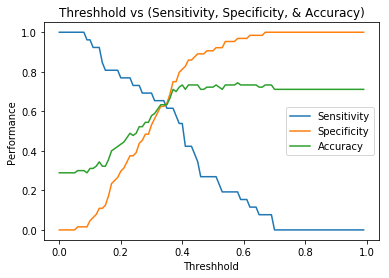

In [24]:
plt.figure()
plt.plot(thresh,sensitivity)
plt.plot(thresh,specificity)
plt.plot(thresh,accuracy)
plt.title('Threshhold vs (Sensitivity, Specificity, & Accuracy)')
plt.ylabel('Performance')
plt.xlabel('Threshhold')
plt.legend(['Sensitivity','Specificity','Accuracy'])

#Question 3

For this dataset, I plan on using age, sex, chest pain, resting blood pressure, and cholesterol in order to determine whether a patient has heart disease or not. I will do this thorugh logistic regression. For this quiz, I will mainly be cleaning up the data to remove variables that I will not be examining and patients whose data have errors according to the dataset description.

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/robbywaxman/Data-Science-Final-Project/master/heart.csv')
df = df.dropna()
df = df.drop(['restecg', 'exang', 'oldpeak','slope','fbs', 'thal','ca','thalach'], axis = 1)
df.head()

,age,sex,cp,trestbps,chol,target
0,63,1,3,145,233,1
1,37,1,2,130,250,1
2,41,0,1,130,204,1
3,56,1,1,120,236,1
4,57,0,0,120,354,1


For this dataset, 0 indiciates presence of heart disease


Here I set the columns of each data frame to the proper variables (x's and y)

In [0]:
x1 = df['age']
x2 = df['sex']
x3 = df['cp']
x4 = df['trestbps']
x5 = df['chol']
y = df['target']

Text(0, 0.5, 'Heart Disease (0 = disease, 1 = healthy)')

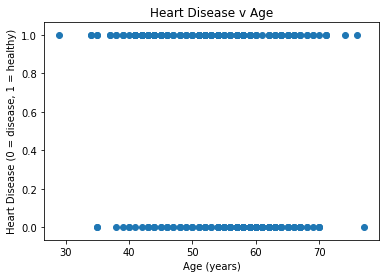

In [45]:
plt.figure()
plt.scatter(x1, y)
plt.title('Heart Disease v Age')
plt.xlabel('Age (years)')
plt.ylabel('Heart Disease (0 = disease, 1 = healthy)')

As you can see, this does not give away too much information about the dataset, so I will look for better ways to display this data.I will start off by displaying the number of people we have with each condition/category in our dataset. Then I will plot Age v Resting Blood Pressure and coloring the scatter based off of diease.

Text(0, 0.5, 'Number of Patients')

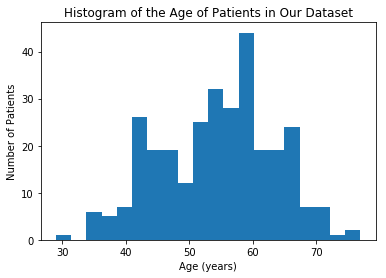

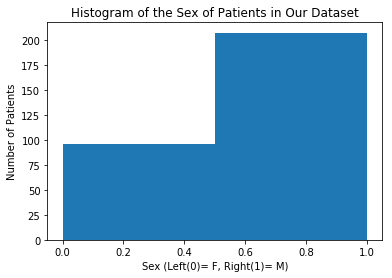

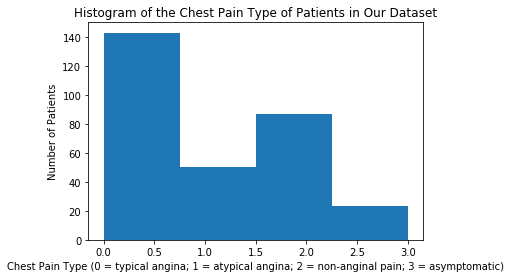

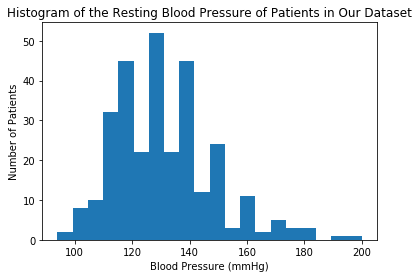

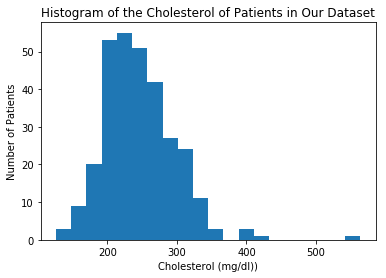

In [105]:
plt.figure()
plt.title('Histogram of the Age of Patients in Our Dataset')
plt.hist(x1, bins=20)
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')


plt.figure()
plt.title('Histogram of the Sex of Patients in Our Dataset')
plt.hist(x2, bins=2)
plt.xlabel('Sex (Left(0)= F, Right(1)= M)')
plt.ylabel('Number of Patients')

plt.figure()
plt.title('Histogram of the Chest Pain Type of Patients in Our Dataset')
plt.hist(x3, bins=4)
plt.xlabel('Chest Pain Type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)')
plt.ylabel('Number of Patients')

plt.figure()
plt.title('Histogram of the Resting Blood Pressure of Patients in Our Dataset')
plt.hist(x4, bins=20)
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Number of Patients')

plt.figure()
plt.title('Histogram of the Cholesterol of Patients in Our Dataset')
plt.hist(x5, bins=20)
plt.xlabel('Cholesterol (mg/dl))')
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Resting Blood Pressure (mmHg)')

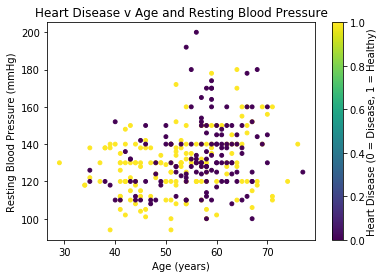

In [69]:
plt.figure()
marker_size = 15
points = plt.scatter(x1, x4, marker_size, c = y)
plt.title('Heart Disease v Age and Resting Blood Pressure')
cbar= plt.colorbar()
cbar.set_label("Heart Disease (0 = Disease, 1 = Healthy)", labelpad=+1)
plt.xlabel('Age (years)')
plt.ylabel('Resting Blood Pressure (mmHg)')

As you can see, this yielded better results. I will continue using more advanced methods to display data.

Text(0.5, 0, 'Resting Blood Pressure (mmHg)')

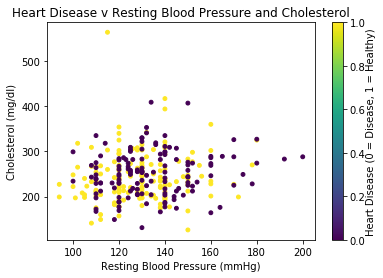

In [70]:
plt.figure()
marker_size = 15
points = plt.scatter(x4, x5, marker_size, c = y)
plt.title('Heart Disease v Resting Blood Pressure and Cholesterol')
cbar= plt.colorbar()
cbar.set_label("Heart Disease (0 = Disease, 1 = Healthy)", labelpad=+1)
plt.ylabel('Cholesterol (mg/dl)')
plt.xlabel('Resting Blood Pressure (mmHg)')

As can be seen so far, the data does not appear to be linearly separable so a basic model may not yield high accuracy.

Text(0.5, 0, 'Cholesterol (mg/dl)')

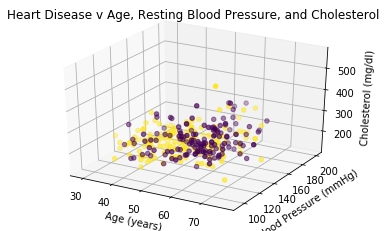

In [91]:
from mpl_toolkits import mplot3d
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x4, x5, c=y, cmap='viridis');
ax.set_title('Heart Disease v Age, Resting Blood Pressure, and Cholesterol')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Blood Pressure (mmHg)')
ax.set_zlabel('Cholesterol (mg/dl)')


Here, is where the data becomes troubling. I have plotted in 3 dimensions and the data still does not appear to be linearly separable. This furthers my idea that a model will be hard to produce, however by increasing dimensions further with our model, it may be easier to separate/get a better model. Here however, we can begin to see grouping of data points showing we may be able to get a reasonable model.

For the project, I will fit a model to the data - probably a multiclass logistic regression. I will do this by splitting the data into train and test. Once the model is fit, I will test the accuracy on the train and test set. If the model is bad, I will look toward other models to see if there are better fits for this dataset.